# From epidemic to pandemic
<p><img style="float: left; margin:5px 20px 5px 1px; width:40%" src="https://www.nps.gov/aboutus/news/images/CDC-coronavirus-image-23311-for-web.jpg?maxwidth=650&autorotate=false"></p>
<p>In December 2019, COVID-19 coronavirus was first identified in the Wuhan region of China. By March 11, 2020, the World Health Organization (WHO) categorized the COVID-19 outbreak as a pandemic. A lot has happened in the months in between with major outbreaks in Iran, South Korea, and Italy. </p>
<p>We know that COVID-19 spreads through respiratory droplets, such as through coughing, sneezing, or speaking. But, how quickly did the virus spread across the globe? And, can we see any effect from country-wide policies, like shutdowns and quarantines? </p>
<p>Fortunately, organizations around the world have been collecting data so that governments can monitor and learn from this pandemic. Notably, the Johns Hopkins University Center for Systems Science and Engineering created a <a href="https://github.com/RamiKrispin/coronavirus">publicly available data repository</a> to consolidate this data from sources like the WHO, the Centers for Disease Control and Prevention (CDC), and the Ministry of Health from multiple countries.</p>
<p>In this notebook, you will visualize COVID-19 data from the first several weeks of the outbreak to see at what point this virus became a global pandemic.</p>
<p><em>Please note that information and data regarding COVID-19 is frequently being updated. The data used in this project was pulled on 27-10-2020, and should not be considered to be the most up to date data available.</em></p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use('fivethirtyeight')
rng = np.random.RandomState(201910)

In [2]:
import requests
import io

url="https://github.com/RamiKrispin/coronavirus/raw/master/csv/coronavirus.csv"
s=requests.get(url).content.decode('utf8')

In [3]:
df = pd.read_csv(io.StringIO(s))
df.set_index(pd.DatetimeIndex(df['date']), inplace=True)
df.drop(['date'], axis=1)
df.head(3)

,date,province,country,lat,long,type,cases
date,,,,,,,
2020-01-22,2020-01-22,NaN,Afghanistan,33.93911,67.709953,confirmed,0
2020-01-23,2020-01-23,NaN,Afghanistan,33.93911,67.709953,confirmed,0
2020-01-24,2020-01-24,NaN,Afghanistan,33.93911,67.709953,confirmed,0


## Confirmed cases throughout the world
The table above shows the cumulative confirmed cases of COVID-19 worldwide by date. Just reading numbers in a data frame makes it hard to get a sense of the scale and growth of the outbreak. Let's draw a line plot to visualize the confirmed cases worldwide

In [4]:
wdf = df.resample('W')

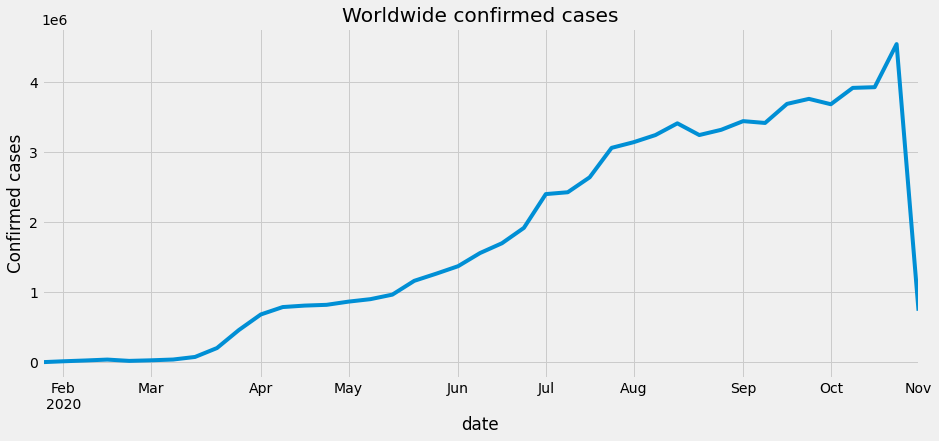

In [5]:
wdf['cases'].sum().plot(figsize = (14, 6))
plt.title('Worldwide confirmed cases')
plt.ylabel('Confirmed cases')
plt.show()

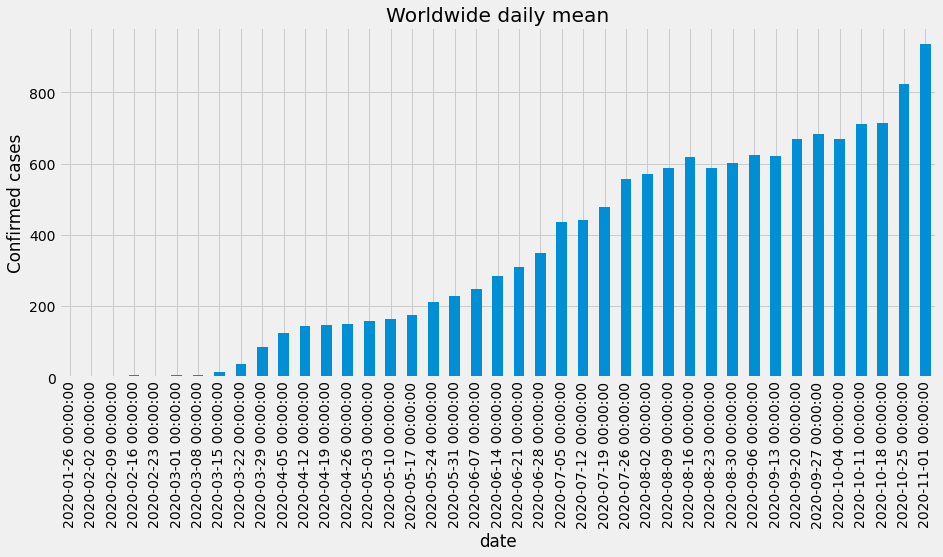

In [6]:
wdf['cases'].mean().plot(figsize = (14, 6), kind='bar', x='date', y='cases')
plt.title('Worldwide daily mean')
plt.ylabel('Confirmed cases')
plt.show()

In [7]:
c_c_wdf = df[['cases','country']]

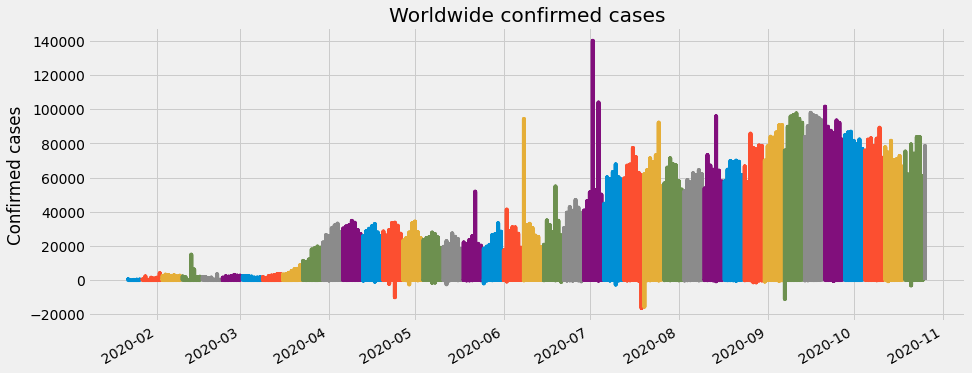

In [8]:
c_c_wdf['cases'].resample('W').plot(figsize = (14, 6))
plt.title('Worldwide confirmed cases')
plt.ylabel('Confirmed cases')
plt.show()

In [9]:
rdf = c_c_wdf.groupby(['date', 'country'])['cases'].aggregate('first').unstack()

In [10]:
rdf = rdf.resample('W')

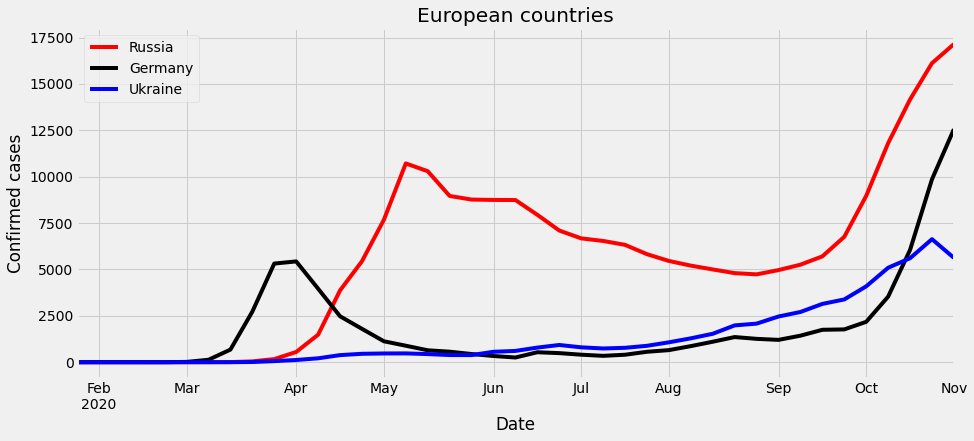

In [11]:
fig= plt.figure(figsize=(14,6))
rdf['Russia'].mean().plot(kind='line', color='red')
rdf['Germany'].mean().plot(kind='line', color='black')
rdf['Ukraine'].mean().plot(kind='line', color='blue')
plt.xlabel('Date')
plt.ylabel('Confirmed cases')
plt.title('European countries')
plt.legend()
plt.show()

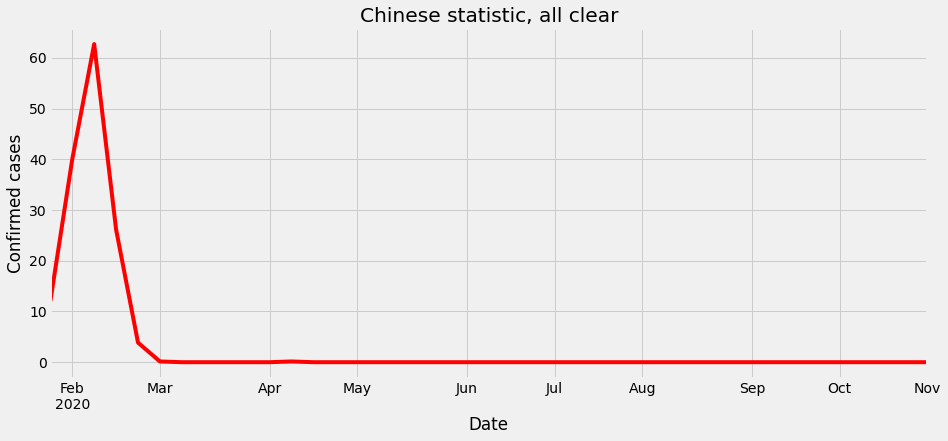

In [12]:
fig= plt.figure(figsize=(14,6))
rdf['China'].mean().plot(kind='line', color='red')
plt.xlabel('Date')
plt.ylabel('Confirmed cases')
plt.title('Chinese statistic, all clear')
plt.show()

We will get some usefull country statistics from [World Bank API](http://wbdata.readthedocs.org/)

In [13]:
import wbdata
wbdata.get_topic()

  id  value
----  -------------------------------
   1  Agriculture & Rural Development
   2  Aid Effectiveness
   3  Economy & Growth
   4  Education
   5  Energy & Mining
   6  Environment
   7  Financial Sector
   8  Health
   9  Infrastructure
  10  Social Protection & Labor
  11  Poverty
  12  Private Sector
  13  Public Sector
  14  Science & Technology
  15  Social Development
  16  Urban Development
  17  Gender
  18  Millenium development goals
  19  Climate Change
  20  External Debt
  21  Trade

In [14]:
wbdata.get_indicator(topic=8)

  Suicide mortality rate (per 100,000 population)
SH.STA.TRAF.P5        Mortality caused by road traffic injury (per 100,000 people)
SH.STA.WASH.P5        Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)
SH.STA.WAST.FE.ZS     Prevalence of wasting, weight for height, female (% of children under 5)
SH.STA.WAST.MA.ZS     Prevalence of wasting, weight for height, male (% of children under 5)
SH.STA.WAST.Q1.ZS     Malnourished children (wasting, -2SD) (% of children under 5): Q1 (lowest)
SH.STA.WAST.Q2.ZS     Malnourished children (wasting, -2SD) (% of children under 5): Q2
SH.STA.WAST.Q3.ZS     Malnourished children (wasting, -2SD) (% of children under 5): Q3
SH.STA.WAST.Q4.ZS     Malnourished children (wasting, -2SD) (% of children under 5): Q4
SH.STA.WAST.Q5.ZS     Malnourished children (wasting, -2SD) (% of children under 5): Q5 (highest)
SH.STA.WAST.ZS        Prevalence of wasting, weight for height (% of children under 5)
SH.ST

In [15]:
indicators={"SP.URB.TOTL":"popUrban",
            "EN.URB.LCTY.UR.ZS":"popLgstCity",
            "EN.POP.EL5M.UR.ZS":"urbBelow5m",
            "EN.POP.SLUM.UR.ZS":"popSlums",
            "SP.POP.TOTL":"popTotal",
            "EN.POP.DNST":"popDens",
            "SH.XPD.CHEX.GD.ZS":"healthExp"
            }

In [16]:
wbdata.get_country()

id    name
----  --------------------------------------------------------------------------------
ABW   Aruba
AFG   Afghanistan
AFR   Africa
AGO   Angola
ALB   Albania
AND   Andorra
ANR   Andean Region
ARB   Arab World
ARE   United Arab Emirates
ARG   Argentina
ARM   Armenia
ASM   American Samoa
ATG   Antigua and Barbuda
AUS   Australia
AUT   Austria
AZE   Azerbaijan
BDI   Burundi
BEA   East Asia & Pacific (IBRD-only countries)
BEC   Europe & Central Asia (IBRD-only countries)
BEL   Belgium
BEN   Benin
BFA   Burkina Faso
BGD   Bangladesh
BGR   Bulgaria
BHI   IBRD countries classified as high income
BHR   Bahrain
BHS   Bahamas, The
BIH   Bosnia and Herzegovina
BLA   Latin America & the Caribbean (IBRD-only countries)
BLR   Belarus
BLZ   Belize
BMN   Middle East & North Africa (IBRD-only countries)
BMU   Bermuda
BOL   Bolivia
BRA   Brazil
BRB   Barbados
BRN   Brunei Darussalam
BSS   Sub-Saharan Africa (IBRD-only countries)
BTN   Bhutan
BWA   Botswana
CAA   Sub-Saharan Africa (IFC classif

In [17]:
countries = ['RUS', 'DEU', 'UKR', 'FRA']
wddf=wbdata.get_dataframe(indicators,country=countries)

In [18]:
wddf

popUrban  popLgstCity  urbBelow5m  popSlums    popTotal  \
country date                                                              
Germany 2020         NaN          NaN         NaN       NaN         NaN   
        2019  64324835.0     5.529423         NaN       NaN  83132799.0   
        2018  64096118.0     5.541869         NaN      0.01  82905782.0   
        2017  63861626.0     5.542036         NaN       NaN  82657002.0   
        2016  63592936.0     5.545256         NaN      0.01  82348669.0   
...                  ...          ...         ...       ...         ...   
Ukraine 1964  22308888.0     6.008955         NaN       NaN  44796964.0   
        1963  21721791.0     5.955798         NaN       NaN  44288608.0   
        1962  21129702.0     5.909113         NaN       NaN  43752230.0   
        1961  20541161.0     5.866387         NaN       NaN  43206345.0   
        1960  19963644.0     5.825820         NaN       NaN  42664652.0   

                 popDens  healthExp  
country date                         
Germany 2020         NaN        NaN  
        2019         NaN        NaN  
        2018  237.307597        NaN  
        2017  236.595495  11.246835  
        2016  235.712929  11.130659  
...                  ...        ...  
Ukraine 1964   77.322800        NaN  
        1963   76.445340        NaN  
        1962   75.519513        NaN  
        1961   74.577276        NaN  
        1960         NaN        NaN  

[244 rows x 7 columns]

In [19]:
dateindex = wddf.index.get_level_values('date')
dateindex = pd.DatetimeIndex(dateindex)
popTotal2019 = wddf.loc[dateindex.year == 2019]['popTotal']
popTotal2019

country             date
Germany             2019     83132799.0
France              2019     67059887.0
Russian Federation  2019    144373535.0
Ukraine             2019     44385155.0
Name: popTotal, dtype: float64

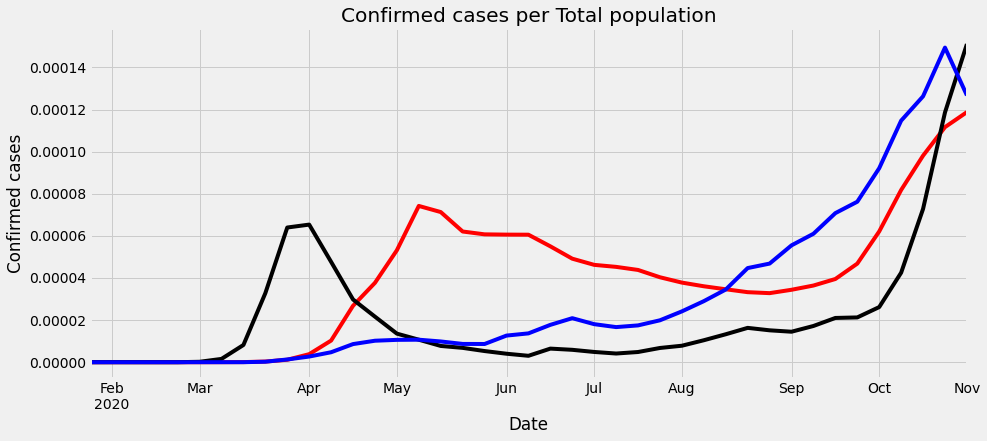

In [20]:
fig= plt.figure(figsize=(14,6))
rdf['Russia'].mean().multiply(other=1/popTotal2019[2]).plot(kind='line', color='red')
rdf['Germany'].mean().multiply(other=1/popTotal2019[0]).plot(kind='line', color='black')
rdf['Ukraine'].mean().multiply(other=1/popTotal2019[3]).plot(kind='line', color='blue')
plt.xlabel('Date')
plt.ylabel('Confirmed cases')
plt.title('Confirmed cases per Total population')
plt.show()